## DASC 550 Project2: House Price Prediction
### [[Can]] [[Mergen]]
### 0078490

#### Submission Deadline: August 22, 2022 11:59 PM

In this project, you are going to build an end-to-end machine learning solution using a convolutional neural network for house price prediction problem. You should use `tensorflow` library to build your neural network.

The data set is provided in a file called `HD.zip`, which contains 4 images per house and `HousesInfo.txt`. You will predict the price  of each house (given in the last column of `HousesInfo.txt`) using the images provided.

While building your regression model, you should use the randomly selected 80\% as training set and the remaining 20\% as test set. You should report the predictive performances on learning, validation and test sets.

You should also report the metrics you choose to measure the performance of the solution you developed and the reasoning behind your choices.

**The code graph is like that:**      

    *New_HD      
        *HousesInfo.txt (This file is created by removing outliers of Price and reducing Zipcode columns)     
    *HD      
        *HousesInfo.txt       
        *All House Images included by Zip folder       
    *Project2_CanMergen.ipynb       
    *model.png      
    *HD.zip       

### Outline of the data analysis process:
#### 1. Data Initial Cleanup   

* The process of making sure data is accurate, consistent, and useable is known as data cleaning. Data can be made clean by locating faults or corruptions, fixing them, erasing them, or manually processing the data as necessary to stop the same errors from happening.      

#### 2. Exploratory Data Analysis (EDA)

* Data analysis utilizing visual methods is called Exploratory Data Analysis (EDA). With the use of statistical summaries and graphical representations, it is used to identify trends, patterns, or to verify assumptions.

#### 3. Data Preprocessing

* Clean the data as there may be many missing data like "" and NaN,
* Clean if there are outliers and biased data column,
* Convert categorical data into numerical representation so that we can use them to train machine learning models,   
* Transform data into suitable forms. In categorical data, we need to convert each class of data into one hot encoding format so that each class is weighted equally and help improve performance of machine learning model.Some transformations are following: Label Encoding -> One Hot Encoding-> Split dataset into test set and training set -> Normalization/Scaling of data -> Oversampling/Not Oversampling

#### 4. Model Selection and Evaluation

* Selection of MLP Model without Oversampling,
* Selection of CNN Model without Oversampling,
* Selection of both MLP and CNN Model together (Multiple Input) without Oversampling,
* Conclusion of the results of both them seperately.

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from scipy.stats import chi2_contingency
import locale
from keras import optimizers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
import tensorflow.keras.layers as Layers
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer,MinMaxScaler
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization,Conv2D,MaxPooling2D,Activation,Dropout,Dense,Flatten,Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
#For extracting zip file and convert it to folder with the name "HD"

#import zipfile as zf
#files = zf.ZipFile("HD.zip", 'r')
#files.extractall('HD')
#files.close()

### 1- Data Initial Cleanup

In [3]:
def load_house_images(data_path, house_count, image_size):
    house_images = np.zeros((house_count, 2 * image_size[0], 2 * image_size[1], 3),
                             dtype = "uint8")
    for i in range(house_count):
        bathroom = image.load_img("./{}/{}_bathroom.jpg".format(data_path, i + 1),
                                  target_size = image_size)
        house_images[i, 0:image_size[0], 0:image_size[1], :] = bathroom
        bedroom = image.load_img("./{}/{}_bedroom.jpg".format(data_path, i + 1),
                                 target_size = image_size)
        house_images[i, 0:image_size[0], image_size[1]:(2 * image_size[1]), :] = bedroom
        frontal = image.load_img("./{}/{}_frontal.jpg".format(data_path, i + 1),
                                  target_size = image_size)
        house_images[i, image_size[0]:(2 * image_size[0]), 0:image_size[1], :] = frontal
        kitchen = image.load_img("./{}/{}_kitchen.jpg".format(data_path, i + 1),
                                 target_size = image_size)
        house_images[i, image_size[0]:(2 * image_size[0]), image_size[1]:(2 * image_size[1]), :] = kitchen
    return house_images

def load_selected_house_images(selected_list,data_path, house_count, image_size):
    house_images = np.zeros((house_count, 2 * image_size[0], 2 * image_size[1], 3),
                             dtype = "uint8")
    for i in range(535):
        if i not in selected_list:
            continue
        else:
            bathroom = image.load_img("./{}/{}_bathroom.jpg".format(data_path, i + 1),
                                  target_size = image_size)
            house_images[i, 0:image_size[0], 0:image_size[1], :] = bathroom
            bedroom = image.load_img("./{}/{}_bedroom.jpg".format(data_path, i + 1),
                                 target_size = image_size)
            house_images[i, 0:image_size[0], image_size[1]:(2 * image_size[1]), :] = bedroom
            frontal = image.load_img("./{}/{}_frontal.jpg".format(data_path, i + 1),
                                  target_size = image_size)
            house_images[i, image_size[0]:(2 * image_size[0]), 0:image_size[1], :] = frontal
            kitchen = image.load_img("./{}/{}_kitchen.jpg".format(data_path, i + 1),
                                 target_size = image_size)
            house_images[i, image_size[0]:(2 * image_size[0]), image_size[1]:(2 * image_size[1]), :] = kitchen
            
    return house_images

def load_house_prices(data_path):
    houses_info = np.loadtxt("./{}/HousesInfo.txt".format(data_path))
    return houses_info[:, 4]

def load_house_prices_total(data_path):
    houses_info = np.loadtxt("./{}/HousesInfo.txt".format(data_path))
    return houses_info[:,:]

**Loading Images:**

In [4]:
house_images = load_house_images("HD", 535, (128, 128))
house_images = house_images/255.0
print(house_images.shape)

(535, 256, 256, 3)


**Loading Only Price Column (Target):**

In [5]:
house_prices = load_house_prices("HD")
print(house_prices.shape)

(535,)


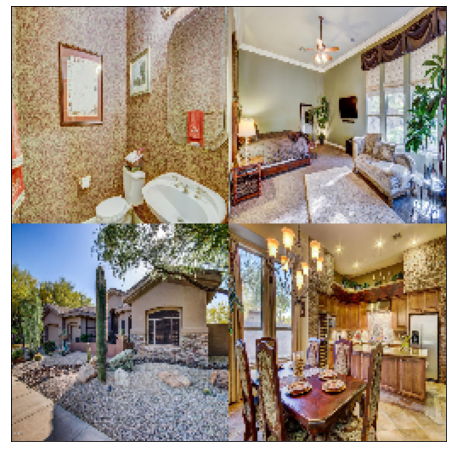

869500.0


In [6]:
#display the first house's picture 
plt.figure(figsize = (8, 8))
plt.imshow(house_images[0, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()
#display the first house's price 
print(house_prices[0])

In [7]:
type(house_images)

numpy.ndarray

**Loading All Columns in HD:**

In [8]:
house_df = pd.DataFrame(load_house_prices_total("HD"))
house_df.columns = ["Bedrooms","Bathrooms","Area","Zipcode","Price"]
house_df.head(5)

Bedrooms  Bathrooms    Area  Zipcode     Price
0       4.0        4.0  4053.0  85255.0  869500.0
1       4.0        3.0  3343.0  36372.0  865200.0
2       3.0        4.0  3923.0  85266.0  889000.0
3       5.0        5.0  4022.0  85262.0  910000.0
4       3.0        4.0  4116.0  85266.0  971226.0

Turned the HD.txt to most understandable side as dividing the names: "Bedrooms", "Bathrooms", "Area", "Zip Code" and the future target column "Price". As it can be seen above, the target column values are not designed for classification it is likely to be performed as regression model. I can change this into 5 labels as: {"almost free","cheap","normal","expensive","dont buy it!"} and make my classification based on that but I would lose so much information and thus this wouldn't have much impact on the project. This project aims to predict the house price and give a reasonable price to the new added one. If I categorize them it would ruin the system and create a nearly meaningless project. **So, I will do my research based on Regression.**

In [9]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   535 non-null    float64
 1   Bathrooms  535 non-null    float64
 2   Area       535 non-null    float64
 3   Zipcode    535 non-null    float64
 4   Price      535 non-null    float64
dtypes: float64(5)
memory usage: 21.0 KB


In [10]:
print(house_df.duplicated().sum(), house_df.isna().sum().sum(), house_df.shape)
print(house_df.nunique())

5 0 (535, 5)
Bedrooms       9
Bathrooms     14
Area         435
Zipcode       49
Price        369
dtype: int64


There are 5 duplicated rows in the dataset, no null values and the shape is (535,5). For further processing, these duplicated columns should be removed if it is totally same.

In [11]:
#See all duplicated rows by including first observation
duplicateRowsDF = house_df[house_df.duplicated(keep=False)]
duplicateRowsDF 

Bedrooms  Bathrooms    Area  Zipcode     Price
58        3.0        2.0  2288.0  62214.0  196000.0
71        3.0        2.0  2288.0  62214.0  196000.0
198       3.0        1.5  1581.0  94501.0  895000.0
213       3.0        1.5  1581.0  94501.0  895000.0
231       6.0        4.0  4311.0  92880.0  695000.0
265       6.0        4.0  4311.0  92880.0  695000.0
269       4.0        3.0  2870.0  92880.0  489000.0
304       4.0        3.0  2870.0  92880.0  489000.0
344       2.0        2.0  1152.0  92276.0   99900.0
352       2.0        2.0  1152.0  92276.0   99900.0

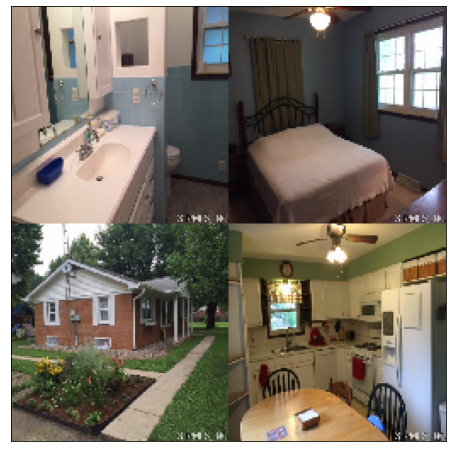

In [12]:
#display the first house's picture 
plt.figure(figsize = (8, 8))
plt.imshow(house_images[58, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()

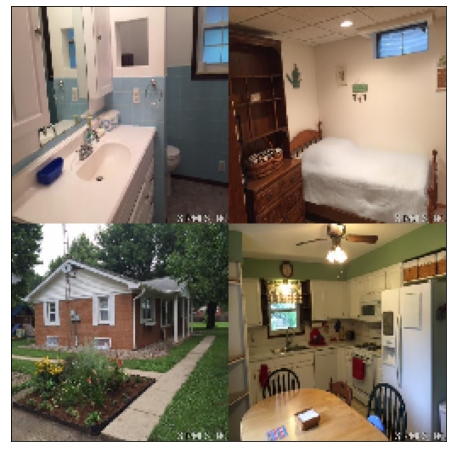

In [13]:
#display the first house's picture 
plt.figure(figsize = (8, 8))
plt.imshow(house_images[71, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()

Even though the house values and the photos are same, the problem starts in this statement. The bedroom photos are different in those images, so it is possible that the owner of the house was renting his rooms with same price but with different places. So, there is no ambiguity in the dataset, we can continue to do our research without removing duplicated rows.

(535, 5) (501, 5)


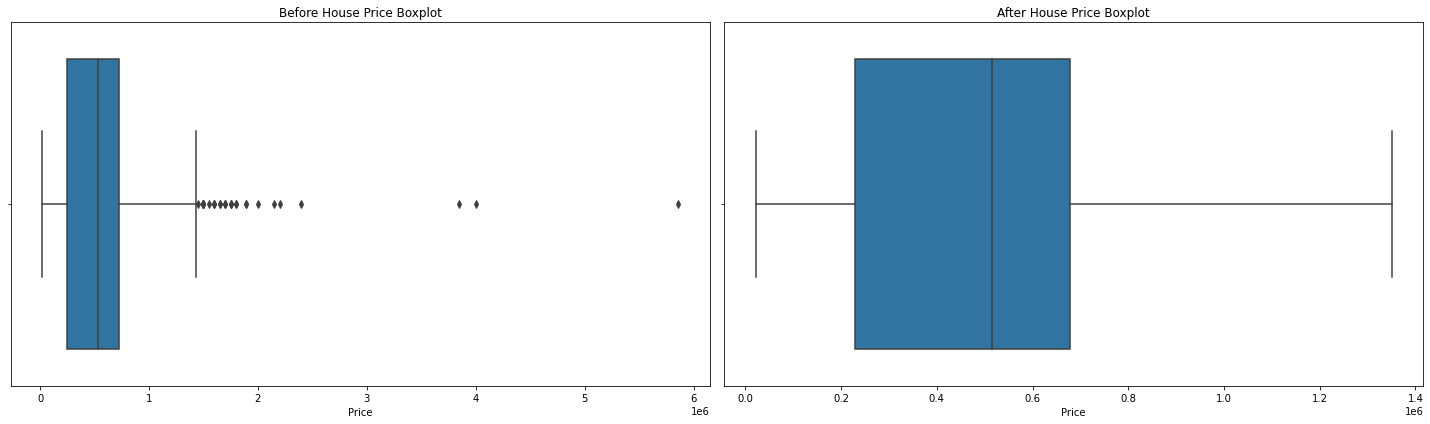

In [14]:
#Removing Outliers
house_df_out = house_df[house_df["Price"] < 1375000]
print(house_df.shape,house_df_out.shape)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(x = "Price", data=house_df, ax=axs[0])
axs[0].set_title('Before House Price Boxplot')
sns.boxplot(x = "Price", data=house_df_out, ax=axs[1])
axs[1].set_title('After House Price Boxplot')
fig.tight_layout()
plt.show()

In [15]:
house_df["Price"].mean()

589362.8112149533

In [16]:
house_df_out["Price"].mean()

497730.75249501

As it can be seen, there are 34 houses which have higher prices than others and this may trick our dataset and turn it into biased one. I will drop these values from the dataset to have a more clear one.This is the minimal point we can reach, if I used 25-75 quantile I was losing 3 houses which can be effective for my dataset, so I used the manual method and removed higher than 1375000 priced houses.

In [17]:
house_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 534
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   501 non-null    float64
 1   Bathrooms  501 non-null    float64
 2   Area       501 non-null    float64
 3   Zipcode    501 non-null    float64
 4   Price      501 non-null    float64
dtypes: float64(5)
memory usage: 23.5 KB


In [18]:
#Discrete Numerical Columns: Bedrooms, Bathrooms
bedrooms_dict = house_df_out["Bedrooms"].value_counts().to_dict()
bathrooms_dict = house_df_out["Bathrooms"].value_counts().to_dict()
print(len(bedrooms_dict),len(bathrooms_dict))
#Continuous Numerical Columns: Price, Area
prices_dict = house_df_out["Price"].value_counts().to_dict()
area_dict = house_df_out["Area"].value_counts().to_dict()
print(len(prices_dict),len(area_dict))

9 13
345 407


In [19]:
#Categorical Columns: Zipcodes
zipcodes_dict = house_df_out["Zipcode"].value_counts().to_dict()
print(len(zipcodes_dict))

46


In [20]:
#Checking if the zipcode (aka: areas or regions) seperated equally or not
print(zipcodes_dict)

{92276.0: 100, 93510.0: 59, 93446.0: 51, 92880.0: 49, 94501.0: 39, 91901.0: 30, 94531.0: 22, 92677.0: 20, 92021.0: 11, 96019.0: 11, 81524.0: 11, 85255.0: 10, 85266.0: 10, 92802.0: 9, 62234.0: 7, 95220.0: 7, 85262.0: 6, 93111.0: 6, 62214.0: 4, 98021.0: 4, 60002.0: 3, 91752.0: 3, 81418.0: 2, 60016.0: 2, 62025.0: 2, 92253.0: 2, 92692.0: 2, 93720.0: 1, 94565.0: 1, 91915.0: 1, 95008.0: 1, 90803.0: 1, 93314.0: 1, 93924.0: 1, 81521.0: 1, 92040.0: 1, 94568.0: 1, 92543.0: 1, 93105.0: 1, 85377.0: 1, 36372.0: 1, 60046.0: 1, 62249.0: 1, 62088.0: 1, 62034.0: 1, 85331.0: 1}


In [21]:
print({k: v for k, v in sorted(zipcodes_dict.items(), key=lambda item: item[1])})

{93720.0: 1, 94565.0: 1, 91915.0: 1, 95008.0: 1, 90803.0: 1, 93314.0: 1, 93924.0: 1, 81521.0: 1, 92040.0: 1, 94568.0: 1, 92543.0: 1, 93105.0: 1, 85377.0: 1, 36372.0: 1, 60046.0: 1, 62249.0: 1, 62088.0: 1, 62034.0: 1, 85331.0: 1, 81418.0: 2, 60016.0: 2, 62025.0: 2, 92253.0: 2, 92692.0: 2, 60002.0: 3, 91752.0: 3, 62214.0: 4, 98021.0: 4, 85262.0: 6, 93111.0: 6, 62234.0: 7, 95220.0: 7, 92802.0: 9, 85255.0: 10, 85266.0: 10, 92021.0: 11, 96019.0: 11, 81524.0: 11, 92677.0: 20, 94531.0: 22, 91901.0: 30, 94501.0: 39, 92880.0: 49, 93446.0: 51, 93510.0: 59, 92276.0: 100}


As it can be seen the region data is unbalanced and this may cause a biased model. I should sanitize the data by deleting any homes with fewer than 20 houses per zip code because the zip code counts for our housing dataset are severely uneven, with some only having 1 or 2 houses per zip code. In later cells, I will remove zipcodes which have smaller than 20 houses to remove bias from my dataset.

In [22]:
#Further Calculations
zipcodes = house_df_out["Zipcode"].value_counts().keys().tolist()
counts = house_df_out["Zipcode"].value_counts().tolist()
for (zipcode, count) in zip(zipcodes, counts):
    if count < 25:
        temp = house_df_out[house_df_out["Zipcode"] == zipcode].index
        house_df_out.drop(temp, inplace=True)
house_df_out

/var/folders/67/jq5rgp0x0pqgdgwhzdq4ypsc0000gn/T/ipykernel_23763/3000657441.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df_out.drop(temp, inplace=True)


Bedrooms  Bathrooms    Area  Zipcode     Price
30        5.0        3.0  2520.0  93446.0  789000.0
32        3.0        2.0  1802.0  93446.0  365000.0
39        3.0        3.0  2146.0  93446.0  455000.0
80        4.0        2.5  2464.0  91901.0  599000.0
81        2.0        2.0  1845.0  91901.0  529800.0
..        ...        ...     ...      ...       ...
498       3.0        2.5  1500.0  93446.0  319000.0
500       3.0        2.0  2330.0  93446.0  599900.0
501       3.0        2.5  1339.0  93446.0  344900.0
502       3.0        2.0  1472.0  93446.0  309995.0
503       4.0        4.0  2681.0  93446.0  572000.0

[328 rows x 5 columns]

The unbalanced problem in the dataset has been resolved so I will continue with the further processes. I will first download the new dataset as "New_HD.txt" and select the HD_images based on that by adding a new list which contains the indexes of new dataset to select only the wanted images from the data to decrease bias and perform better results.

**Changing Price and Images:** 

In [23]:
#Taking the dataset's index values for images
new_image_index = house_df_out.index.tolist()
#Saving as a new .txt file
np.savetxt(r'New_HD/HousesInfo.txt', house_df_out.values, fmt='%d')

In [24]:
#Gathering new house prices from the dataset
new_house_prices = load_house_prices("New_HD")
print(new_house_prices.shape)

(328,)


In [25]:
#----------- Selecting New Images and New Dataset For Further Calculations -----------
temp_house_images = load_selected_house_images(new_image_index,"HD", 535, (128, 128))
print(temp_house_images.shape)

(535, 256, 256, 3)


In [26]:
new_house_images = np.zeros((328, 2 * (128,128)[0], 2 * (128,128)[1], 3),
                             dtype = "uint8")
i = 0
for j in new_image_index:
    new_house_images[i] = temp_house_images[j]
    i += 1

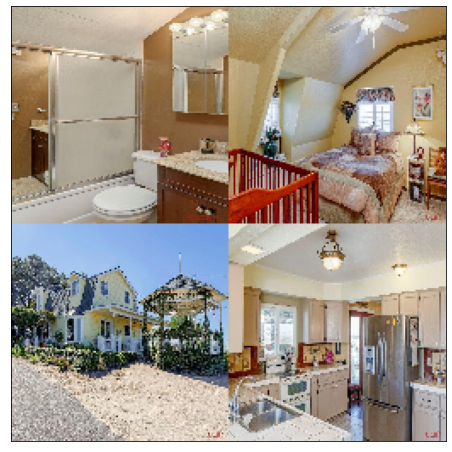

789000.0


In [27]:
#display the first house's picture 
plt.figure(figsize = (8, 8))
plt.imshow(new_house_images[0, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()
#display the first house's price 
print(new_house_prices[0])

New house prices and new images according to that are combined perfectly. Now, I can continue to do my further evaluations withut confronting any previous bias. 

### 2- Exploratory Data Analysis (EDA)

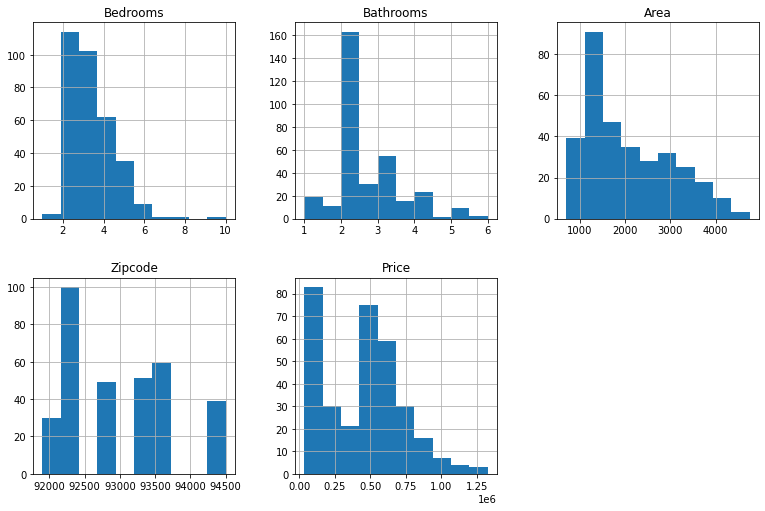

In [28]:
house_df_out.hist(layout = (3,3), sharex=False,figsize = (13,13))
plt.show()

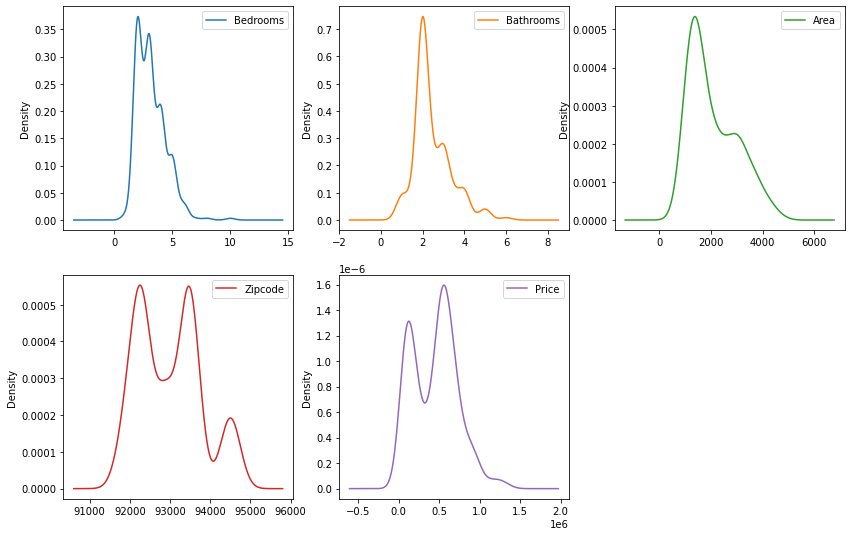

In [29]:
house_df_out.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize = (14,14))
plt.show()

In [30]:
px.bar(house_df_out,y="Bathrooms",x="Bedrooms",color="Price")

In [31]:
#Count Plot
continuous_house_df_out = ["Area","Bedrooms","Bathrooms"]
#Box Plot
numerical_house_df_out = ["Zipcode","Price"]

Area  Bedrooms  Bathrooms   Zipcode     Price
Area       1.000000  0.814402   0.835385  0.027981  0.608106
Bedrooms   0.814402  1.000000   0.789598  0.137251  0.563795
Bathrooms  0.835385  0.789598   1.000000 -0.021557  0.475726
Zipcode    0.027981  0.137251  -0.021557  1.000000  0.524813
Price      0.608106  0.563795   0.475726  0.524813  1.000000

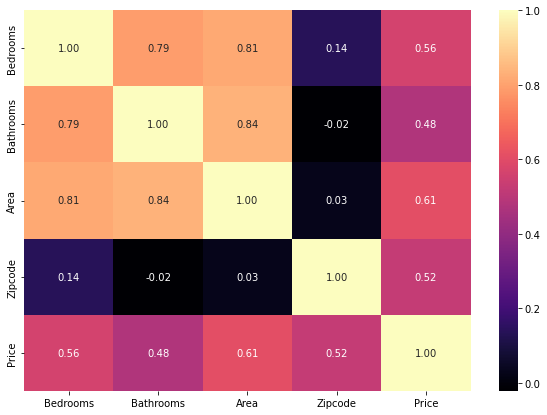

In [32]:
f, ax = plt.subplots(figsize= [10,7])
sns.heatmap(house_df_out.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
correlation = house_df_out[continuous_house_df_out+numerical_house_df_out].corr()
correlation

### 3- Data Preprocessing

In [33]:
chi2_array, p_array = [], []
for column in ["Zipcode","Bedrooms","Bathrooms","Area"]:
    crosstab = pd.crosstab(house_df_out[column], house_df_out['Price'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': ["Zipcode","Bedrooms","Bathrooms","Area"],
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

Variable    Chi-square   p-value
3       Area  60438.298575  0.473666
2  Bathrooms   2028.031701  1.000000
1   Bedrooms   1750.749143  0.988672
0    Zipcode   1237.643345  0.118712

They all provide useful information about the price,thus they musn't be dropped.

In [34]:
maxPrice = house_df_out["Price"].max()
house_df_out["Price"] = house_df_out["Price"] / maxPrice

/var/folders/67/jq5rgp0x0pqgdgwhzdq4ypsc0000gn/T/ipykernel_23763/2365908881.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Turning Price column to between 0 and 1 numbers to train and test better results.

In [35]:
#Splitting the data into two dataset, X for every column except the target column and y as target column
X = house_df_out.drop(columns=["Price"])
y = house_df_out["Price"]
print(X.shape, y.shape)

(328, 4) (328,)


In [36]:
#Checking the zipcodes again
zipcodes_dict = house_df_out["Zipcode"].value_counts().to_dict()
print(len(zipcodes_dict))

6


Zipcodes has 8 variables.So, doing only labelencoder won't work. I have to use OneHotEncoder to create dummies efficiently for multiple columns.

In [37]:
X["Zipcode"] = X["Zipcode"].astype(int)
X["Zipcode"] = X["Zipcode"].astype(str)
X = pd.get_dummies(X,columns = ["Zipcode"],drop_first = False)

I will do the same process for bedrooms and bathrooms too. These are discrete numerical values but this may come in handy for further processing.

In [38]:
maxArea = X["Area"].max()
X["Area"] = X["Area"] / maxArea

In [39]:
X.head(5)

Bedrooms  Bathrooms      Area  Zipcode_91901  Zipcode_92276  \
30       5.0        3.0  0.530638              0              0   
32       3.0        2.0  0.379448              0              0   
39       3.0        3.0  0.451885              0              0   
80       4.0        2.5  0.518846              1              0   
81       2.0        2.0  0.388503              1              0   

    Zipcode_92880  Zipcode_93446  Zipcode_93510  Zipcode_94501  
30              0              1              0              0  
32              0              1              0              0  
39              0              1              0              0  
80              0              0              0              0  
81              0              0              0              0

In [40]:
y.head(5)

30    0.594267
32    0.274915
39    0.342702
80    0.451161
81    0.399040
Name: Price, dtype: float64

In [41]:
#This will come in handy in the future
print(maxPrice,maxArea)

1327685.0 4749.0


**For MLP:**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234, shuffle = True)

print('Training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('Test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

Training data has 262 observation with 9 features
Test data has 66 observation with 9 features


In [43]:
#Feature Scaling
scaler = preprocessing.MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

In [ ]:
X_learn, X_val, y_learn, y_val = train_test_split(X_train, y_train, test_size = 0.2,
                                                  random_state = 1234, shuffle = True)

print('Learn data has ' + str(X_learn.shape[0]) + ' observation with ' + str(X_learn.shape[1]) + ' features')
print('Validaton data has ' + str(X_val.shape[0]) + ' observation with ' + str(X_val.shape[1]) + ' features')

**For CNN:**

In [ ]:
maxNHPrice = new_house_prices.max()
new_house_prices = new_house_prices/maxNHPrice

In [ ]:
#(trainAttr, testAttr, trainImages, testImages) = train_test_split(new_house_prices,new_house_images, test_size=0.2, random_state=1234)
Xtrain_cnn, Xtest_cnn, ytrain_cnn, ytest_cnn = train_test_split(new_house_images,new_house_prices, test_size=0.2, random_state=1234)

print('Training data length: ' + str(len(Xtrain_cnn)))
print('Test data length: ' + str(len(Xtest_cnn)))

In [ ]:
#(trainAttrX, testAttrX, trainImagesX, testImagesX) = train_test_split(trainAttr, trainImages, test_size=0.2, random_state=1234)
Xlearn_cnn, Xval_cnn, ylearn_cnn, yval_cnn = train_test_split(Xtrain_cnn, ytrain_cnn, test_size=0.2, random_state=1234)

print('Training data length: ' + str(len(Xlearn_cnn)))
print('Test data length: ' + str(len(Xval_cnn)))

**For MLP + CNN:**

In [ ]:
trainAttrX, testAttrX, trainImagesX, testImagesX = train_test_split(house_df_out, new_house_images, test_size=0.2, random_state=1234)


In [ ]:
trainAttrX

In [ ]:
trainAttrX["Zipcode"].value_counts()

In [ ]:
testAttrX["Zipcode"] = testAttrX["Zipcode"].astype(int)
testAttrX["Zipcode"] = testAttrX["Zipcode"].astype(str)
testAttrX = pd.get_dummies(testAttrX,columns = ["Zipcode"],drop_first = True)

In [ ]:
trainAttrX["Zipcode"] = trainAttrX["Zipcode"].astype(int)
trainAttrX["Zipcode"] = trainAttrX["Zipcode"].astype(str)
trainAttrX = pd.get_dummies(trainAttrX,columns = ["Zipcode"],drop_first = True)

In [ ]:
print(trainAttrX.shape,testAttrX.shape,trainImagesX.shape,testImagesX.shape)

In [ ]:
maxPrice_mi1 = trainAttrX["Price"].max()
trainAttrX_mi1 = trainAttrX["Price"] / maxPrice_mi1
testAttrX_mi1 = testAttrX["Price"] / maxPrice_mi1

In [ ]:
learnX, valX, learny, valy = train_test_split(trainAttrX, trainImagesX, test_size = 0.2,
                                                  random_state = 1234, shuffle = True)
print(learnX.shape,valX.shape,learny.shape,valy.shape)

In [ ]:
maxPrice_mi = learnX["Price"].max()
trainY_mi = learnX["Price"] / maxPrice_mi
testY_mi = valX["Price"] / maxPrice_mi

In [ ]:
cs = MinMaxScaler()
learnX = cs.fit_transform(learnX)
valX = cs.transform(valX)

**Calculations:**

In [ ]:
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] mean house price: {}, median house price: {}, std house price: {}".format(
    locale.currency(house_df_out["Price"].mean()*maxPrice, grouping=True),
    locale.currency(house_df_out["Price"].median()*maxPrice, grouping=True),
    locale.currency(house_df_out["Price"].std()*maxPrice, grouping=True)))

In [ ]:
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] mean house price: {}, median house price: {}, std house price: {}".format(
    locale.currency(np.mean(new_house_prices)*maxNHPrice, grouping=True),
    locale.currency(np.median(new_house_prices)*maxNHPrice, grouping=True),
    locale.currency(np.std(new_house_prices)*maxNHPrice, grouping=True)))

### 4. Model Selection and Evaluation

**(ANN) Multi-Layer Perceptron Model:** 

In [ ]:
es1 = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=20)
es2 = EarlyStopping(monitor='mean_absolute_error', mode='min', verbose=1, patience=20)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(32, name = "First_RELU", activation = "relu",input_dim = X_learn.shape[1]),
    keras.layers.Dropout(0.4, name = "Dropout_1"), # To Avoid Overfitting and Underfitting
    keras.layers.Dense(16, name = "Second_RELU", activation = "relu"),
    keras.layers.Dropout(0.4, name = "Dropout_2"), # To Avoid Overfitting and Underfitting
    keras.layers.Dense(8, name = "Third_RELU", activation = "relu"),
    keras.layers.Dense(1, name = "Output_Sigmoid", activation = "linear")
])

model.summary()

In [ ]:
keras.utils.plot_model(model,show_shapes = True,
                       show_dtype = True,show_layer_activations = True)

In [ ]:
model.compile(optimizer = "adam",
                  loss = "mean_squared_error",
                  metrics = ["mean_absolute_error","mean_absolute_percentage_error"])

In [ ]:
model_history = model.fit(X_learn, y_learn,
                          epochs = 100,
                          verbose = 1, batch_size = 32,
                          callbacks=[es1,es2],
                          validation_data = (X_val, y_val))

In [ ]:
print('Training_set_results: {}'.format(model.evaluate(X_learn, y_learn)))
print('Validation_set_results: {}'.format(model.evaluate(X_val, y_val)))
print('Test_set_results: {}'.format(model.evaluate(X_test, y_test)))

In [ ]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(model_history.history["mean_absolute_error"])
plt.plot(model_history.history["val_mean_absolute_error"])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(model_history.history["mean_absolute_percentage_error"])
plt.plot(model_history.history["val_mean_absolute_percentage_error"])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

**CNN Model:** 

In [ ]:
CNN_model = keras.models.Sequential([
            keras.layers.Input(shape = (Xlearn_cnn.shape[1] , 
                                        Xlearn_cnn.shape[2] ,
                                        Xlearn_cnn.shape[3] )),
            keras.layers.Conv2D(16,kernel_size = (3, 3)),
            keras.layers.Activation("relu"),
            keras.layers.BatchNormalization(axis=-1),
            keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    
            keras.layers.Conv2D(32,kernel_size = (3, 3)),
            keras.layers.Activation("relu"),
            keras.layers.BatchNormalization(axis=-1),
            keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    
            keras.layers.Conv2D(64,kernel_size = (3, 3)),
            keras.layers.Activation("relu"),
            keras.layers.BatchNormalization(axis=-1),
            keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    
            keras.layers.Flatten(),
            keras.layers.Dense(8, activation = "relu"),
            keras.layers.BatchNormalization(axis=-1),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(4, activation = "relu"),
            keras.layers.Dense(1, activation = "linear")
])

CNN_model.summary()

In [ ]:
# compiled network
CNN_model.compile(optimizer = "adam",
                  loss = "mean_squared_error",
                  metrics = ["mean_absolute_error","mean_absolute_percentage_error"])

In [ ]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 30, restore_best_weights=True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "mean_absolute_percentage_error",patience = 30, restore_best_weights=True)

# learned network
cnn_history = CNN_model.fit(Xlearn_cnn, ylearn_cnn, epochs=1000, batch_size=32,
                            verbose = 1, 
                            callbacks=[early_stopping1,early_stopping2],
                            validation_data = (Xval_cnn, yval_cnn))

In [ ]:
print('Training_set_results: {}'.format(CNN_model.evaluate(Xlearn_cnn, ylearn_cnn)))
print('Validation_set_results: {}'.format(CNN_model.evaluate(Xval_cnn, yval_cnn)))
print('Test_set_results: {}'.format(CNN_model.evaluate(Xtest_cnn, ytest_cnn)))

In [ ]:
plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(cnn_history.history["mean_absolute_error"])
plt.plot(cnn_history.history["val_mean_absolute_error"])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(cnn_history.history["mean_absolute_percentage_error"])
plt.plot(cnn_history.history["val_mean_absolute_percentage_error"])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**(MLP + CNN) Multiple Inputs:**

In [ ]:
mlp_model = Sequential()
mlp_model.add(Dense(16, input_dim=X_learn.shape[1], activation="relu"))
mlp_model.add(Dropout(0.4))
mlp_model.add(Dense(8, activation="relu"))

mlp_model.summary()

In [ ]:
cnn_model = Sequential()
cnn_model.add(Input(shape = (Xlearn_cnn.shape[1] , 
                                        Xlearn_cnn.shape[2] ,
                                        Xlearn_cnn.shape[3])))
cnn_model.add(Conv2D(16,kernel_size = (3, 3), activation="relu"))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

cnn_model.add(Conv2D(32,kernel_size = (3, 3), activation="relu"))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

cnn_model.add(Conv2D(64,kernel_size = (3, 3), activation="relu"))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

cnn_model.add(Flatten())
cnn_model.add(Dense(16, activation = "relu"))
cnn_model.add(BatchNormalization(axis=-1))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(8, activation = "relu"))

cnn_model.summary()

In [ ]:
from tensorflow.keras.layers import concatenate
combinedInput = concatenate([mlp_model.output, cnn_model.output])

In [ ]:
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)

In [ ]:
model_mi = Model(inputs=[mlp_model.input, cnn_model.input], outputs=x)
model_mi.summary()

In [ ]:
model_mi.compile(optimizer = "adam",
                  loss = "mean_squared_error",
                  metrics = ["mean_absolute_error","mean_absolute_percentage_error"])

In [ ]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 20, restore_best_weights=True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "mean_absolute_percentage_error",patience = 20, restore_best_weights=True)

model_mi_history = model_mi.fit(x=[learnX, learny], y=trainY_mi,
                                epochs=200, batch_size=8,
                                callbacks=[early_stopping1,early_stopping2],
                                validation_data=([valX, valy], testY_mi))

In [ ]:
print('Training_set_results: {}'.format(model_mi.evaluate([learnX, learny],trainY_mi)))
print('Validation_set_results: {}'.format(model_mi.evaluate([valX, valy], testY_mi)))
print('Test_set_results: {}'.format(model_mi.evaluate([trainAttrX, trainImagesX],trainAttrX_mi1)))

In [ ]:
plt.plot(model_mi_history.history["loss"])
plt.plot(model_mi_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(model_mi_history.history["mean_absolute_error"])
plt.plot(model_mi_history.history["val_mean_absolute_error"])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(model_mi_history.history["mean_absolute_percentage_error"])
plt.plot(model_mi_history.history["val_mean_absolute_percentage_error"])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()